Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, Conv2D, MaxPooling2D

In [2]:

## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive')
root_path = 'gdrive/My Drive/Train/'
##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Mounted at /content/gdrive


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [3]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path(root_path)
data_dir_test = pathlib.Path('path_to_test_directory')

In [4]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [5]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [11]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir_train,
    labels='inferred',
    color_mode='rgb',
    batch_size=32,
    image_size=(img_height, img_width),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset="training"
)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


In [12]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir_train,
    labels='inferred',
    color_mode='rgb',
    batch_size=32,
    image_size=(img_height, img_width),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset="validation"
)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [13]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

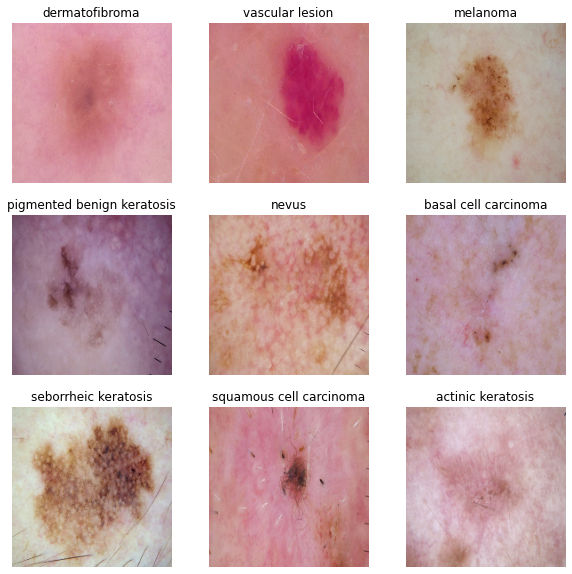

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
uniqueClasses = [];
counter = 1
while counter > 0:
  for images, labels in train_ds.take(counter):
    for i in range(32):
      if class_names[labels[i]] not in uniqueClasses:
        uniqueClasses.append(class_names[labels[i]])
        ax = plt.subplot(3, 3, len(uniqueClasses))
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
      if len(uniqueClasses) == len(class_names):
        break
    if len(uniqueClasses) < 9:
      counter += 1
    else:
      counter = 0

### your code goes here, you can use training or validation data to visualize

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [ ]:
### Your code goes here
model = Sequential()
model.add(tf.keras.layers.experimental.preprocessing.Rescaling(scale = 1./255, input_shape = (180, 180, 3)))
model.add(Conv2D(32, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(len(class_names)))


### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [ ]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

### Train the model

In [ ]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 216s 841ms/step - loss: 2.0537 - accuracy: 0.2360 - val_loss: 1.9004 - val_accuracy: 0.2774
Epoch 2/20
56/56 [==============================] - 2s 31ms/step - loss: 1.7459 - accuracy: 0.3834 - val_loss: 1.7551 - val_accuracy: 0.3311
Epoch 3/20
56/56 [==============================] - 2s 30ms/step - loss: 1.5734 - accuracy: 0.4453 - val_loss: 1.4861 - val_accuracy: 0.4832
Epoch 4/20
56/56 [==============================] - 2s 30ms/step - loss: 1.4924 - accuracy: 0.4821 - val_loss: 1.5572 - val_accuracy: 0.4251
Epoch 5/20
56/56 [==============================] - 2s 30ms/step - loss: 1.3707 - accuracy: 0.5218 - val_loss: 1.4586 - val_accuracy: 0.5123
Epoch 6/20
56/56 [==============================] - 2s 30ms/step - loss: 1.3169 - accuracy: 0.5379 - val_loss: 1.6123 - val_accuracy: 0.4810
Epoch 7/20
56/56 [==============================] - 2s 30ms/step - loss: 1.2736 - accuracy: 0.5597 - val_loss: 1.4656 - val_accuracy: 0.4989
Epoch 8/20

### Visualizing training results

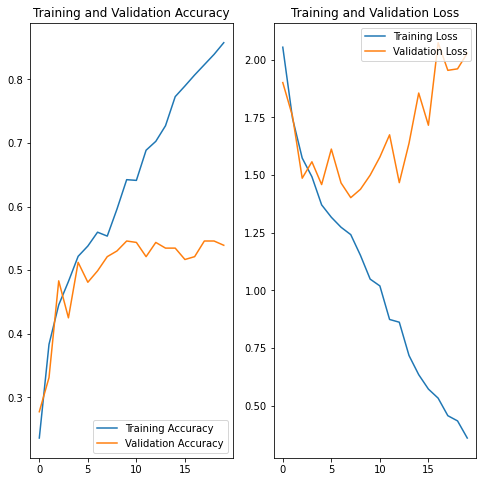

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### __Observations__: Traininng and Validation accuracy have huge difference. The model is highly overfitting the data.

### Write your findings here

In [ ]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


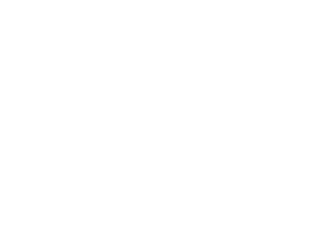

In [ ]:
for img, label in train_ds.take(1):
  for i in range(9):
    augmented_image = data_augmentation(img)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_image[i+1])
    plt.axis("off")
  break

### Todo:
### Create the model, compile and train the model


In [ ]:
## You can use Dropout layer if there is an evidence of overfitting in your findings
model = Sequential()
model.add(data_augmentation)
model.add(tf.keras.layers.experimental.preprocessing.Rescaling(scale = 1./255, input_shape = (180, 180, 3)))

model.add(Conv2D(32, 3, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, 3, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, 3, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, 3, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, 3, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, 3, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(tf.keras.layers.Flatten())
model.add(Dense(512,kernel_regularizer=tf.keras.regularizers.l2(0.01), activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(len(class_names),activation='softmax'))

### Compiling the model

In [ ]:
## Your code goes here
model.compile(optimizer='adam',
              loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Training the model

In [ ]:
## Your code goes here, note: train your model for 20 epochs
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


56/56 [==============================] - 13s 163ms/step - loss: 37.3045 - accuracy: 0.2294 - val_loss: 28.4876 - val_accuracy: 0.1834
Epoch 2/20
56/56 [==============================] - 7s 128ms/step - loss: 16.8859 - accuracy: 0.2494 - val_loss: 39.9245 - val_accuracy: 0.0492
Epoch 3/20
56/56 [==============================] - 7s 129ms/step - loss: 11.2862 - accuracy: 0.2729 - val_loss: 33.3208 - val_accuracy: 0.0649
Epoch 4/20
56/56 [==============================] - 7s 129ms/step - loss: 7.5769 - accuracy: 0.3030 - val_loss: 36.1494 - val_accuracy: 0.1655
Epoch 5/20
56/56 [==============================] - 7s 129ms/step - loss: 5.2590 - accuracy: 0.3365 - val_loss: 27.7977 - val_accuracy: 0.1902
Epoch 6/20
56/56 [==============================] - 7s 129ms/step - loss: 3.8032 - accuracy: 0.3890 - val_loss: 27.7313 - val_accuracy: 0.2058
Epoch 7/20
56/56 [==============================] - 7s 128ms/step - loss: 2.9784 - accuracy: 0.3979 - val_loss: 17.0016 - val_accuracy: 0.2103
Epoch 

### Visualizing the results

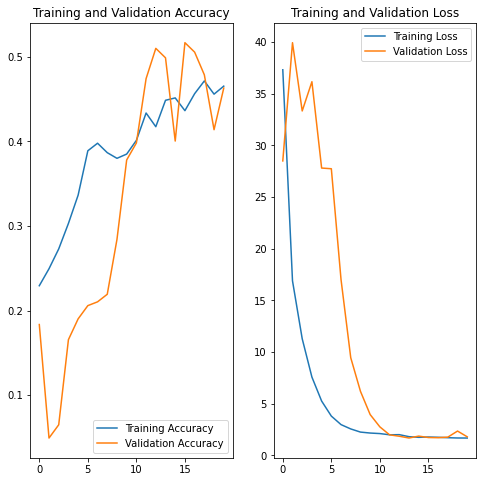

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### __Observation:__ Now the model is not overfitting but it is underfitting as accuracy for train and validation is very less. We can improve it by making classes balanced.

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

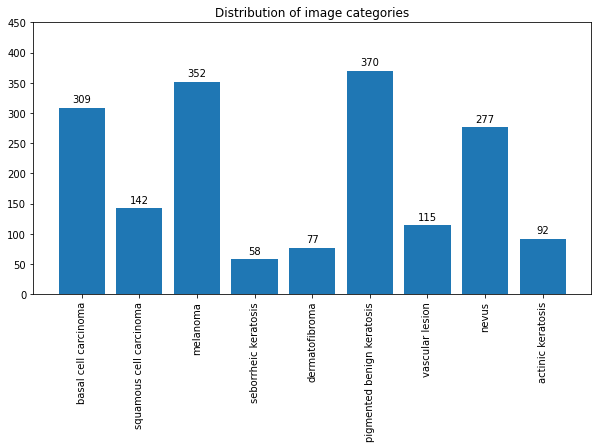

In [ ]:
def calculate_and_plot_distribution(ds, rangeYTicks):
  # Calculating the count of all categories of images
  classCount = {}
  for image, label in ds.unbatch().as_numpy_iterator():
    className = class_names[label]
    if className in classCount:
      classCount[className] += 1
    else:
      classCount[className] = 1

  plt.figure(figsize=(10,5))
  # Plotting distribution of image categories
  ax = plt.bar(classCount.keys(), classCount.values())
  plt.title("Distribution of image categories")
  plt.xticks(rotation=90)
  plt.yticks(ticks=rangeYTicks)
  # Make some labels.
  labels = classCount.values()
  for rect, label in zip(ax.patches, labels):
      height = rect.get_height()
      plt.annotate(
          label, (rect.get_x() + rect.get_width() / 2, height + 5), ha="center", va="bottom"
      )
  plt.show()

# Plot distribution of unbalanced dataset
calculate_and_plot_distribution(train_ds, range(0,451,50))

#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
#### ANS - __seborrheic keratosis__
#### - Which classes dominate the data in terms proportionate number of samples?
#### ANS - __'basal cell carcinoma', 'melanoma', 'nevus', 'pigmented benign keratosis'__

#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [ ]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [ ]:
path_to_training_dataset=root_path
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=25, max_right_rotation=25)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to gdrive/My Drive/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F6CD31F9550>: 100%|██████████| 500/500 [00:19<00:00, 25.42 Samples/s]


Initialised with 376 image(s) found.
Output directory set to gdrive/My Drive/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F6CD339F810>: 100%|██████████| 500/500 [00:18<00:00, 27.02 Samples/s]


Initialised with 95 image(s) found.
Output directory set to gdrive/My Drive/Train/dermatofibroma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F6D607C1590>: 100%|██████████| 500/500 [00:19<00:00, 25.50 Samples/s]


Initialised with 438 image(s) found.
Output directory set to gdrive/My Drive/Train/melanoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7F6CD80AFBD0>: 100%|██████████| 500/500 [01:38<00:00,  5.08 Samples/s]


Initialised with 357 image(s) found.
Output directory set to gdrive/My Drive/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=3072x2304 at 0x7F6D60556110>: 100%|██████████| 500/500 [01:32<00:00,  5.39 Samples/s]


Initialised with 462 image(s) found.
Output directory set to gdrive/My Drive/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F6D6D4C8FD0>: 100%|██████████| 500/500 [00:18<00:00, 26.44 Samples/s]


Initialised with 77 image(s) found.
Output directory set to gdrive/My Drive/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F6D602464D0>: 100%|██████████| 500/500 [00:45<00:00, 11.01 Samples/s]


Initialised with 181 image(s) found.
Output directory set to gdrive/My Drive/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F6D6CD93350>: 100%|██████████| 500/500 [00:19<00:00, 26.27 Samples/s]


Initialised with 139 image(s) found.
Output directory set to gdrive/My Drive/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F6CD9629B50>: 100%|██████████| 500/500 [00:19<00:00, 25.57 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [ ]:
data_dir_train = pathlib.Path("gdrive/My Drive/Train/")
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [ ]:
from glob import glob
glob_old = glob(os.path.join(data_dir_train, '*', '*.jpg'))
path_list = list(glob_old)

# new path
glob_new = glob(os.path.join(data_dir_train, '*','output', '*.jpg'))
path_list_new = list(glob_new)

In [ ]:
print(path_list_new[0])
print(path_list[0])

gdrive/My Drive/Train/vascular lesion/output/vascular lesion_original_ISIC_0024867.jpg_576c0e7d-a33e-4bdf-afde-f4b1a8bf86dc.jpg
gdrive/My Drive/Train/vascular lesion/ISIC_0024662.jpg


In [ ]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob_new]
lesion_list = [os.path.basename(os.path.dirname(y)) for y in glob_old]

In [ ]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))
dataframe_dict = dict(zip(path_list, lesion_list))

In [ ]:
dataframe_dict_new.update(dataframe_dict)
new_df = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])

In [ ]:
new_df['Label'].value_counts()

pigmented benign keratosis    962
melanoma                      938
basal cell carcinoma          876
nevus                         857
squamous cell carcinoma       681
vascular lesion               639
actinic keratosis             614
dermatofibroma                595
seborrheic keratosis          577
Name: Label, dtype: int64

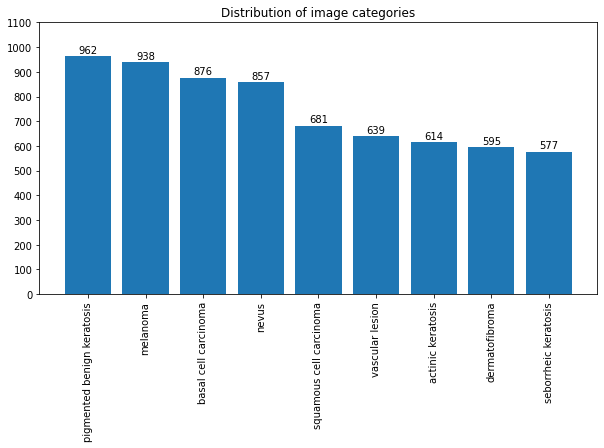

In [ ]:
plt.figure(figsize=(10,5))
# Plotting distribution of image categories
ax = plt.bar(new_df['Label'].value_counts().index, new_df['Label'].value_counts())
plt.title("Distribution of image categories")
plt.xticks(rotation=90)
plt.yticks(ticks=range(0,1101,100))
# Make some labels.
labels = new_df['Label'].value_counts()
for rect, label in zip(ax.patches, labels):
    height = rect.get_height()
    plt.annotate(
        label, (rect.get_x() + rect.get_width() / 2, height + 5), ha="center", va="bottom"
    )
plt.show()

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [6]:
data_dir_train=pathlib.Path("gdrive/My Drive/Train/")
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "training",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [7]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [18]:
## You can use Dropout layer if there is an evidence of overfitting in your findings
model = Sequential()
model.add(tf.keras.layers.experimental.preprocessing.Rescaling(scale = 1./255, input_shape = (180, 180, 3)))

model.add(Conv2D(64, 3, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, 3, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, 3, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, 3, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, 3, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(256, 3, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(tf.keras.layers.Flatten())
model.add(Dense(512,kernel_regularizer=tf.keras.regularizers.l2(0.01), activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(len(class_names),activation='softmax'))

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [19]:
## your code goes here
model.compile(optimizer='adam',
              loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [20]:
epochs = 50
## Your code goes here, use 50 epochs.
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


169/169 [==============================] - 66s 354ms/step - loss: 56.6100 - accuracy: 0.2322 - val_loss: 176.8405 - val_accuracy: 0.1084
Epoch 2/50
169/169 [==============================] - 54s 312ms/step - loss: 14.8063 - accuracy: 0.2771 - val_loss: 47.5188 - val_accuracy: 0.1106
Epoch 3/50
169/169 [==============================] - 54s 311ms/step - loss: 5.0200 - accuracy: 0.3069 - val_loss: 5.2575 - val_accuracy: 0.1886
Epoch 4/50
169/169 [==============================] - 53s 309ms/step - loss: 2.8266 - accuracy: 0.3127 - val_loss: 2.6155 - val_accuracy: 0.3073
Epoch 5/50
169/169 [==============================] - 54s 313ms/step - loss: 2.5370 - accuracy: 0.3229 - val_loss: 2.4614 - val_accuracy: 0.3497
Epoch 6/50
169/169 [==============================] - 53s 308ms/step - loss: 2.5931 - accuracy: 0.3284 - val_loss: 2.9067 - val_accuracy: 0.3979
Epoch 7/50
169/169 [==============================] - 54s 313ms/step - loss: 2.7081 - accuracy: 0.3503 - val_loss: 2.1708 - val_accuracy

#### **Todo:**  Visualize the model results

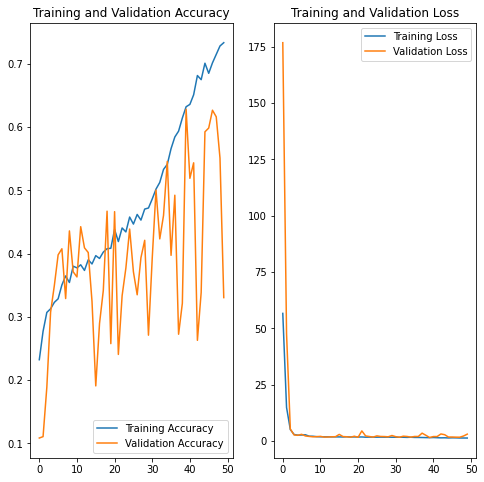

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



1. Overfitting issues are improved little bit but not completely removed.
2. Class rebalance help in increasing accuracy of the model.